## Deep moonquake PCA notebook 

A simple tutorial to decompose example deep moonquake waveforms using the principal component analysis. 

For full details please see Turner et al,. 2022

## Getting set up 

### conda enviroment 

This code only needs obspy create an enviroment following. 

```

$ conda create -n obspy python=3.7   # or other supported Python version
$ conda activate obspy  # this command used to be 'source activate obspy' on older conda versions < 4.4
(obspy) $ 
(obspy) $ conda install obspy

```

### Inputs 
* A list of waveforms with initial time picks 
* The processed waveforms on this list
* A picked time window 

### Data and initial data processing 
The waveforms supplied in 'Example data' are 3-component long period Apollo seismic data downloaded from the GEOSCOPE observatory through the IPGP data centre (http://datacenter.ipgp.fr/). For more easily accessible data, please see Nunn et al. (2022) (https://github.com/cerinunn/apollo-shoulders ), which contains accessible lunar seismic data and processing scripts.

To identify A01 moonquakes, we use the Nakamura (2003) catalogue with updates from Bulow 2005. Each A01 moonquake at station S12 is correlated with a template event for each operational mode in a 5-minute window around the first arrival (template events are given in table S.1 and plotted in Figure S.1). The template was chosen as the A01 event a high amplitude and no data gaps recorded at station S12 in each operational mode. Events will be used for the PCA if they have a maximum cross-correlation value of greater than 0.3 with the template event in the cross-correlation window. The time shift of the maximum cross correlation is also taken as the initial time shift to align the events. Finally, we check the events by eye to ensure no events with large data gaps in the time period of the first arrival. Events recorded at Stations 12 and 16 are rotated to the correct orientations given by \citet{nunn2020lunar}, as they were misaligned on instalment.
The rotated A01 event waveforms are despiked using a median filter, resampled to twice the original sampling rate and are bandpass filtered between 0.25 Hz and 1.75 Hz.

### Process 
PCA decomposes a matrix of waveforms (U) into the principal components (G) and the co-efficents (m):

\begin{equation}
 U_{k}(t) = \sum_{ j = 1}^{ J} G_{j}(t) m_{jk}.
\end{equation}

The PCA is dependent on the waveform allignment. The waveforms are alligned first using the cross correaltion, then by searching for the time shift between events that maximized the energy in the first principal compoent. 
<br>
The PCA is carried out using the singular value decomposition. 

### Outputs 

* ds.S = Singular values/variance explained by each principal component
* ds.U = principal components
* ds.V = weights for each event for each principal compoent 


### References 

Nunn, Ceri, et al. "Standing on Apollo's Shoulders: a Microseismometer for the Moon." The Planetary Science Journal 2.1 (2021): 36.

Nakamura, Yosio. "New identification of deep moonquakes in the Apollo lunar seismic data." Physics of the Earth and Planetary Interiors 139.3-4 (2003): 197–205.

Bulow, R. C., C. L. Johnson, and P. M. Shearer. "New events discovered in the Apollo lunar seismic data." Journal of Geophysical Research: Planets 110.E10 (2005).

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


/home/users/lina3509/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/core/trace.py:2111: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(self.data.dtype, float):
/home/users/lina3509/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/core/trace.py:2111: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(self.data.dtype, float):


FINE TUNE
number of iterations:5
iteration:0
iteration:1
iteration:2
iteration:3
iteration:4
FINE TUNE DONE
[1325 1334 1337 1331 1332 1335 1326 1334 1327 1333 1333 1332 1330 1328
 1332]


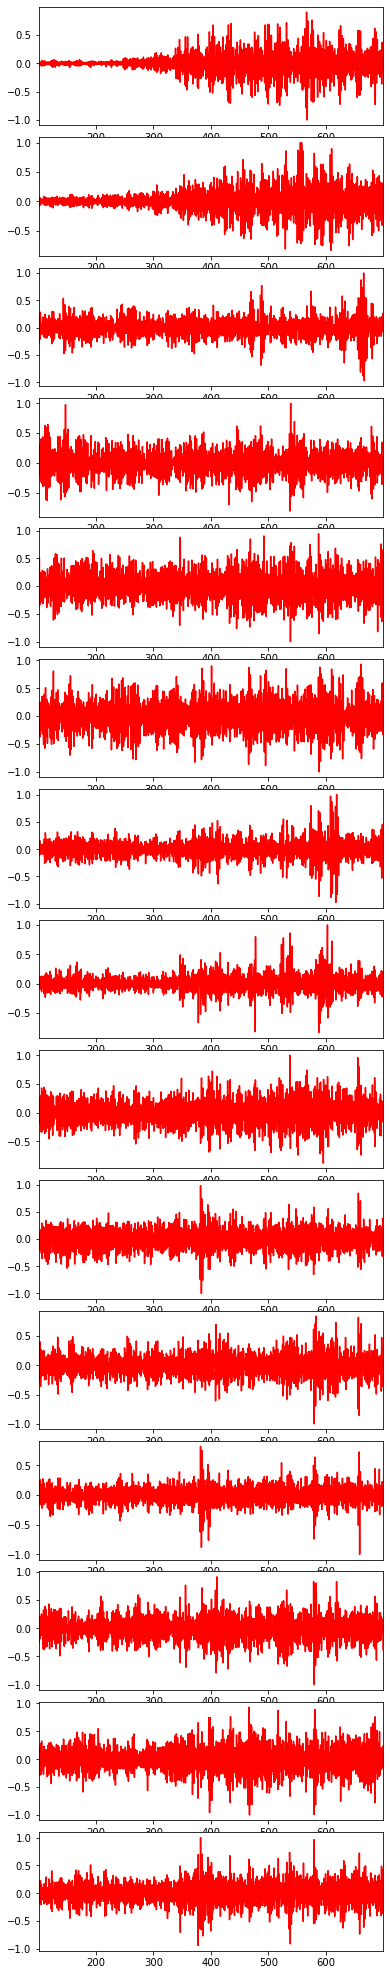

In [1]:
#having a go at running 
import planetseis_Xcorr_time_listin 
ds = planetseis_Xcorr_time_listin.dstack()
ds.setup('../input_list/S12_MHN_peaked.txt','single_moonquake',[100,700])
#the setup giving a list of events, and then the final part is the timewindow 
ds.xcorr(master = ds.adata[:,0,0,0,0]) #alligning the events using cross correlation 
print("FINE TUNE")
ds.iterative_grid_fine_tune(search_range =5, temp = 1000, Niter = 5) #fine tune the timeshifts using PCA 
print("FINE TUNE DONE")
print(ds.ishfs.flatten())
ds.replaceadata(iev=ds.iev,ichan = ds.ichan,istat = ds.istat,ifreq = ds.ifreq)
ds.initadata()
ds.calcperclow_saved() #calculate the components using PCA 
ds.plotU(Ncmp=ds.Nev) # plotting all the principal components


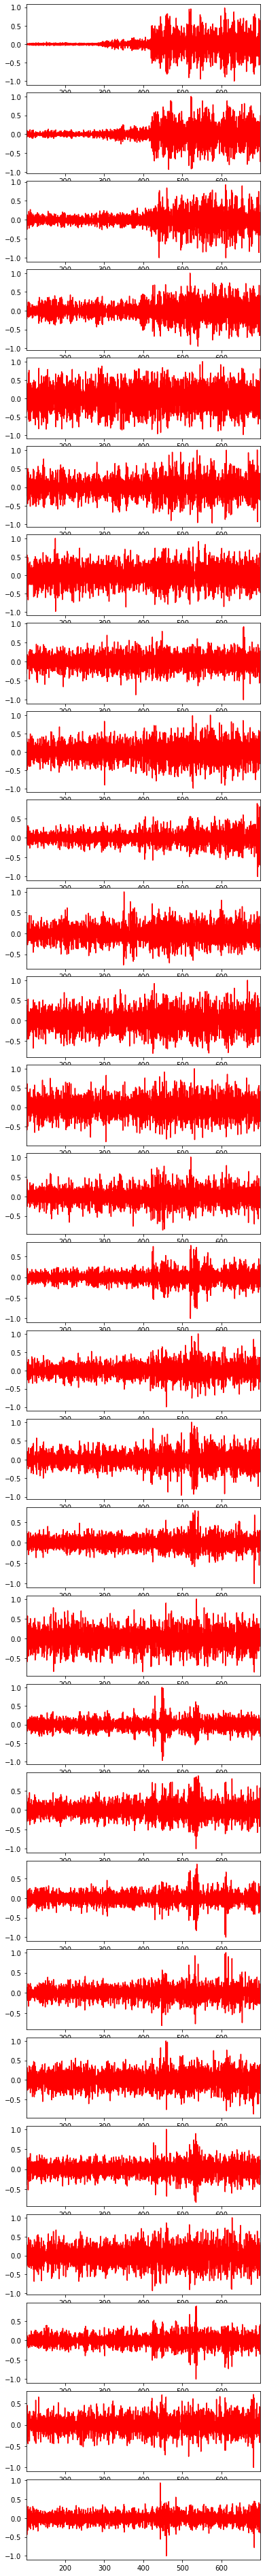

In [3]:
ds.plotU(Ncmp=ds.Nev)